In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5786866736628701187
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15240134656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4805306749989119184
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
xla_global_id: 416903419
]


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
# Specifica i percorsi delle cartelle di addestramento e validazione
train_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Final_Organoids_Dataset/train_folder'
val_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Final_Organoids_Dataset/val_folder'

#train_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/dataset_prova/train'
#val_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/dataset_prova/val'

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))


In [ ]:
# create the base pre-trained model
#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)
# Load base model without its top layer
base_model = InceptionV3(weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


# Reference to the output of the base model
x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a dense layer
x = Dense(512, activation='relu')(x)

# Add final dense layer for 4 classes with softmax activation
predictions = Dense(4, activation='softmax')(x)

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# (Optional) To only train the top layers and freeze the rest:
for layer in base_model.layers:
    layer.trainable = False

# Compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint

In [ ]:
batch_size = 128
num_epochs = 40


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Utilizza l'ImageDataGenerator per la generazione di dati
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Definisci i generatori di dati per l'addestramento e la validazione
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18537 images belonging to 4 classes.
Found 2058 images belonging to 4 classes.


In [ ]:
import time
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint_filepath = '/content/best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

# Start measuring time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[model_checkpoint_callback]  # Add the ModelCheckpoint to the callbacks list
)

# End measuring time
end_time = time.time()

# Calculate computational cost
computational_cost = end_time - start_time

# Print computational cost
print(f"Computational cost for model.fit: {computational_cost} seconds")

Epoch 1/40
144/144 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.7638 
Epoch 1: val_loss improved from inf to 0.45394, saving model to /content/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


144/144 [==============================] - 5474s 37s/step - loss: 0.6523 - accuracy: 0.7638 - val_loss: 0.4539 - val_accuracy: 0.8198
Epoch 2/40
144/144 [==============================] - ETA: 0s - loss: 0.4498 - accuracy: 0.8211
Epoch 2: val_loss improved from 0.45394 to 0.41140, saving model to /content/best_model.h5
144/144 [==============================] - 88s 614ms/step - loss: 0.4498 - accuracy: 0.8211 - val_loss: 0.4114 - val_accuracy: 0.8335
Epoch 3/40
144/144 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.8325
Epoch 3: val_loss did not improve from 0.41140
144/144 [==============================] - 89s 620ms/step - loss: 0.4176 - accuracy: 0.8325 - val_loss: 0.4301 - val_accuracy: 0.8271
Epoch 4/40
144/144 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.8415
Epoch 4: val_loss did not improve from 0.41140
144/144 [==============================] - 90s 622ms/step - loss: 0.3946 - accuracy: 0.8415 - val_loss: 0.4156 - val_accuracy

In [ ]:
#track the curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

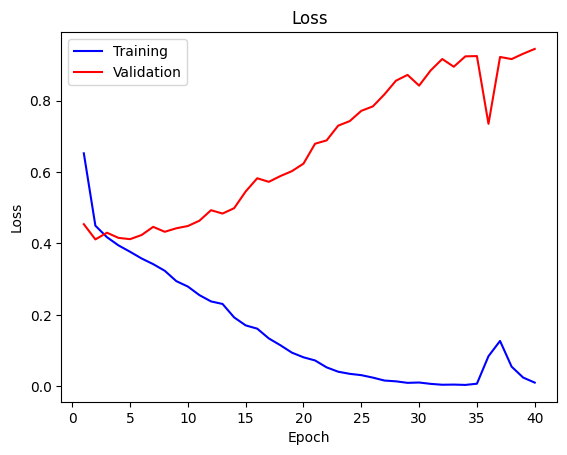

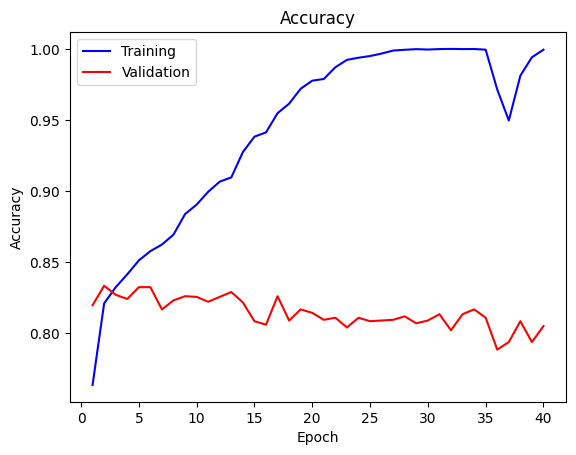

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined train_loss, val_loss, train_acc, and val_acc

epochs = range(1, len(train_loss) + 1)

# Plot and save the loss figure with 600 DPI
plt.plot(epochs, train_loss, 'b-', label='Training')
plt.plot(epochs, val_loss, 'r-', label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the figure in a suitable format (e.g., PNG) with 600 DPI for line drawings
plt.savefig('loss_plot_line_drawings.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

# Plot and save the accuracy figure with 600 DPI
plt.plot(epochs, train_acc, 'b-', label='Training')
plt.plot(epochs, val_acc, 'r-', label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the figure in a suitable format (e.g., PNG) with 600 DPI for line drawings
plt.savefig('accuracy_plot_line_drawings.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = '/content/drive/MyDrive/ORGANOIDS_EXPERIMENTS/Final_Organoids_Dataset/test_folder'

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2468 images belonging to 4 classes.


In [ ]:
#DA PROVARE

import time
import numpy as np
from keras.models import load_model

# Load the best model
model_path = '/content/best_model.h5'
model = load_model(model_path)

# Start measuring time
start_time = time.time()

# Assuming you have defined test_generator
# This is just for measuring the time spent on loading data and making predictions

# Load true labels
y_true = test_generator.classes  # Etichette reali

# Make predictions
y_pred = model.predict(test_generator)  # Previsioni del modello

# Calculate predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)  # Classi predette

# End measuring time
end_time = time.time()

# Calculate computational cost
computational_cost = end_time - start_time

# Print computational cost
print(f"Computational cost: {computational_cost} seconds")

20/20 [==============================] - 772s 41s/step
Computational cost: 815.3621251583099 seconds


In [ ]:
y_pred

array([[9.9822313e-01, 1.1336462e-03, 4.5973507e-06, 6.3861388e-04],
       [9.9846637e-01, 2.7611529e-04, 1.3808458e-06, 1.2560879e-03],
       [9.9652869e-01, 9.1842568e-04, 9.0285721e-06, 2.5438576e-03],
       ...,
       [8.1359041e-01, 1.5234455e-01, 4.7259658e-05, 3.4017775e-02],
       [9.8622364e-01, 8.4066857e-03, 5.3849230e-06, 5.3643440e-03],
       [8.7198418e-01, 4.3539662e-04, 4.5126765e-07, 1.2757996e-01]],
      dtype=float32)

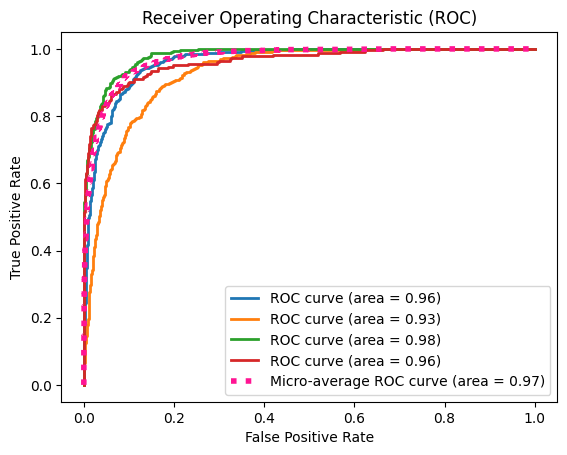

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming you have defined y_true and y_pred_classes as described in your code
# y_true contains true labels, and y_pred_classes contains predicted classes

# Binarize the true labels (one-hot encoding)
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"],
         color='deeppink', linestyle=':', linewidth=4)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# Save the figure in a suitable format (e.g., PNG) with 600 DPI for line drawings
plt.savefig('roc_curves.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


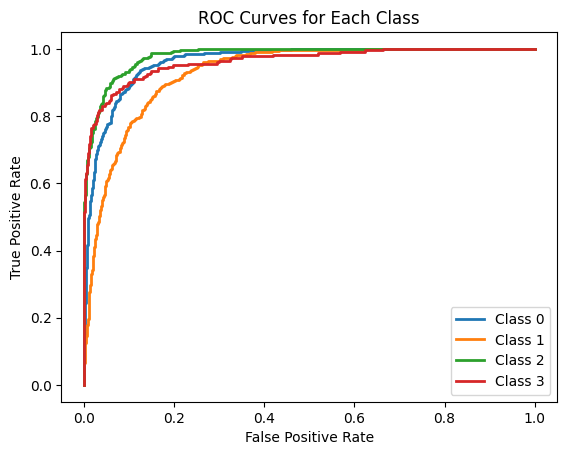

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have defined y_true and y_pred as described in your previous code
# y_true contains true labels, and y_pred contains predicted probabilities

# Binarize the true labels (one-hot encoding)
n_classes = 4  # Number of classes (change to your actual number of classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Initialize dictionaries to store FPR and TPR for each class
fpr_dict = {}
tpr_dict = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])

# Plot ROC curves for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], lw=lw, label=f'Class {i}')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.savefig('roc_curves_for_class.png', format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

# Save FPR and TPR values to separate CSV files for each class
for i in range(n_classes):
    class_name = f'Class_{i}'
    fpr = fpr_dict[i]
    tpr = tpr_dict[i]

    # Save FPR and TPR values for the class to a CSV file
    with open(f'{class_name}_roc_curve.csv', 'w') as file:
        file.write('False Positive Rate, True Positive Rate\n')
        for j in range(len(fpr)):
            file.write(f'{fpr[j]}, {tpr[j]}\n')


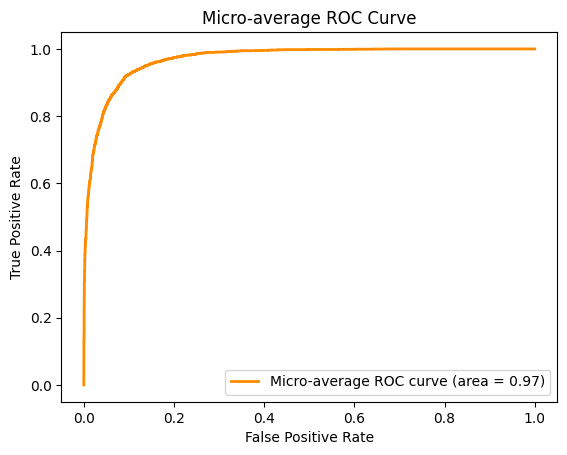

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming you have defined y_true and y_pred as described in your previous code
# y_true contains true labels, and y_pred contains predicted probabilities

# Binarize the true labels (one-hot encoding)
n_classes = 4  # Number of classes (change to your actual number of classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr_micro, tpr_micro, color='darkorange',
         lw=lw, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")
plt.savefig('micro_avg_roc_curves.png', format='png', dpi=600, bbox_inches='tight')


# Show the plot
plt.show()

import pandas as pd

# Create a dataframe with fpr_micro and tpr_micro
df = pd.DataFrame({'fpr_micro': fpr_micro, 'tpr_micro': tpr_micro})

# Save the dataframe to a CSV file
df.to_csv('fpr_tpr_micro_values.csv', index=False)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8407617504051864
Precision: 0.8435588881818673
Recall: 0.8407617504051864
F1-score: 0.8392379177161627


In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Matrice di confusione:")
print(confusion_mtx)

Matrice di confusione:
[[1213   69    0   12]
 [  89  407   51    1]
 [   1   92  308    0]
 [  64   13    1  147]]


In [ ]:
# Assuming you have defined confusion_mtx as described in your code

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Save the confusion matrix values to a text file (e.g., CSV)
with open('confusion_matrix.csv', 'w') as file:
    file.write("Confusion Matrix:\n")
    for row in confusion_mtx:
        file.write(','.join(map(str, row)) + '\n')

Confusion Matrix:
[[1213   69    0   12]
 [  89  407   51    1]
 [   1   92  308    0]
 [  64   13    1  147]]


In [ ]:
#print PPT

import numpy as np
from sklearn.metrics import roc_curve

# Assuming you have defined y_true and y_pred as described in your previous code
# y_true contains true labels, and y_pred contains predicted probabilities

# Binarize the true labels (one-hot encoding)
n_classes = 4  # Number of classes (change to your actual number of classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Initialize dictionaries to store FPR and TPR for each class
fpr_dict = {}
tpr_dict = {}

# Compute ROC curve for each class
for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])

# Print TPR and FPR for each class
for i in range(n_classes):
    print(f"Class {i}:")
    print(f"TPR (True Positive Rate): {tpr_dict[i]}")
    print(f"FPR (False Positive Rate): {fpr_dict[i]}")
    print()


Class 0:
TPR (True Positive Rate): [0.00000000e+00 7.72797527e-04 3.86398764e-02 3.86398764e-02
 1.43740340e-01 1.43740340e-01 1.49922720e-01 1.49922720e-01
 1.70015456e-01 1.70015456e-01 2.44204019e-01 2.44204019e-01
 2.98299845e-01 2.98299845e-01 3.49304482e-01 3.49304482e-01
 3.82534776e-01 3.82534776e-01 4.08809892e-01 4.08809892e-01
 4.17310665e-01 4.17310665e-01 4.50540958e-01 4.50540958e-01
 4.81452859e-01 4.81452859e-01 4.95363215e-01 4.95363215e-01
 5.03091190e-01 5.03091190e-01 5.06182380e-01 5.06182380e-01
 5.33230294e-01 5.33230294e-01 5.43276662e-01 5.43276662e-01
 5.48686244e-01 5.48686244e-01 5.54868624e-01 5.54868624e-01
 5.66460587e-01 5.66460587e-01 5.68778980e-01 5.68778980e-01
 5.85007728e-01 5.85007728e-01 6.03554869e-01 6.03554869e-01
 6.04327666e-01 6.04327666e-01 6.09737249e-01 6.09737249e-01
 6.25965997e-01 6.25965997e-01 6.32921175e-01 6.32921175e-01
 6.35239567e-01 6.35239567e-01 6.41421947e-01 6.41421947e-01
 6.73106646e-01 6.73106646e-01 6.76197836e-01 6.76

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have defined y_true and y_pred_classes as described in your previous code
# y_true contains true labels, and y_pred_classes contains predicted classes

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate classification report
classification_rep = classification_report(y_true, y_pred_classes)

# Calculate overall accuracy
accuracy = np.mean(y_true == y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Print classification report
print("\nClassification Report:")
print(classification_rep)

# Print overall accuracy
print(f"\nOverall Accuracy: {accuracy:.2%}")


Confusion Matrix:
[[1213   69    0   12]
 [  89  407   51    1]
 [   1   92  308    0]
 [  64   13    1  147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1294
           1       0.70      0.74      0.72       548
           2       0.86      0.77      0.81       401
           3       0.92      0.65      0.76       225

    accuracy                           0.84      2468
   macro avg       0.84      0.78      0.80      2468
weighted avg       0.84      0.84      0.84      2468


Overall Accuracy: 84.08%


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_true and y_pred_classes as described in your previous code
# y_true contains true labels, and y_pred_classes contains predicted classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Calculate sensitivity (TPR) and specificity for each class
sensitivity = []
specificity = []

for i in range(len(confusion_mtx)):
    true_positives = confusion_mtx[i, i]
    false_negatives = np.sum(confusion_mtx[i, :]) - true_positives
    true_negatives = np.sum(confusion_mtx) - np.sum(confusion_mtx[i, :]) - np.sum(confusion_mtx[:, i]) + true_positives
    false_positives = np.sum(confusion_mtx[:, i]) - true_positives

    sensitivity_i = true_positives / (true_positives + false_negatives)
    specificity_i = true_negatives / (true_negatives + false_positives)

    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)

# Print sensitivity and specificity for each class
for i in range(len(sensitivity)):
    print(f"Class {i}:")
    print(f"Sensitivity (True Positive Rate): {sensitivity[i]:.2f}")
    print(f"Specificity (True Negative Rate): {specificity[i]:.2f}")
    print()


Class 0:
Sensitivity (True Positive Rate): 0.94
Specificity (True Negative Rate): 0.87

Class 1:
Sensitivity (True Positive Rate): 0.74
Specificity (True Negative Rate): 0.91

Class 2:
Sensitivity (True Positive Rate): 0.77
Specificity (True Negative Rate): 0.97

Class 3:
Sensitivity (True Positive Rate): 0.65
Specificity (True Negative Rate): 0.99



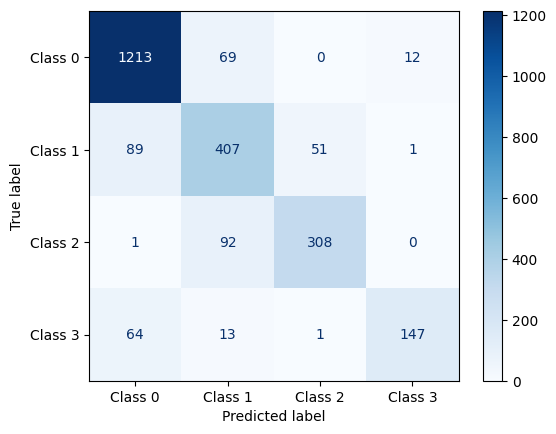

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# Display labels for the classes
display_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=display_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Save the figure as a PNG file
plt.savefig('cm_conf_4_classes.png', dpi=100)

# Show the plot
plt.show()


In [ ]:
confusion_mtx

array([[1213,   69,    0,   12],
       [  89,  407,   51,    1],
       [   1,   92,  308,    0],
       [  64,   13,    1,  147]])

In [ ]:
import numpy as np

def print_confusion_matrix(matrix):
    print("Confusion Matrix:")
    print("array(", end='')
    for i, row in enumerate(matrix):
        if i == 0:
            print("[", end='')
        else:
            print("       [", end='')

        for j, value in enumerate(row):
            end_char = ", " if j < len(row) - 1 else "]"
            print(f"{value:>4}", end=end_char)

        if i < len(matrix) - 1:
            print(",")
        else:
            print("])")

# Test
matrix = np.array([
    [1213,   69,    0,   12],
    [  89,  407,   51,    1],
    [   1,   92,  308,    0],
    [  64,   13,    1,  147]
])
print_confusion_matrix(matrix)


Confusion Matrix:
array([1213,   69,    0,   12],
       [  89,  407,   51,    1],
       [   1,   92,  308,    0],
       [  64,   13,    1,  147]])


In [ ]:
import numpy as np

def compute_metrics(matrix):
    num_classes = matrix.shape[0]

    # True positives
    TP = np.diag(matrix)

    # False positives
    FP = matrix.sum(axis=0) - TP

    # False negatives
    FN = matrix.sum(axis=1) - TP

    # True negatives
    TN = matrix.sum() - (FP + FN + TP)

    # Accuracy
    overall_accuracy = TP.sum() / matrix.sum()

    # Sensitivity/Recall
    sensitivity = TP / (TP + FN)

    # Specificity
    specificity = TN / (TN + FP)

    # Precision
    precision = TP / (TP + FP)

    # F1 Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    return overall_accuracy, sensitivity, specificity, f1_score

# Test
matrix = np.array([
    [1213,   69,    0,   12],
    [  89,  407,   51,    1],
    [   1,   92,  308,    0],
    [  64,   13,    1,  147]
])

overall_accuracy, sensitivity, specificity, f1_score = compute_metrics(matrix)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
for i in range(matrix.shape[0]):
    print(f"\nClass {i} metrics:")
    print(f"Sensitivity/Recall: {sensitivity[i]:.4f}")
    print(f"Specificity: {specificity[i]:.4f}")
    print(f"F1 Score: {f1_score[i]:.4f}")


Overall Accuracy: 0.8408

Class 0 metrics:
Sensitivity/Recall: 0.9374
Specificity: 0.8688
F1 Score: 0.9117

Class 1 metrics:
Sensitivity/Recall: 0.7427
Specificity: 0.9094
F1 Score: 0.7210

Class 2 metrics:
Sensitivity/Recall: 0.7681
Specificity: 0.9748
F1 Score: 0.8095

Class 3 metrics:
Sensitivity/Recall: 0.6533
Specificity: 0.9942
F1 Score: 0.7636


In [ ]:
import numpy as np

def compute_metrics(matrix):
    num_classes = matrix.shape[0]

    # True positives
    TP = np.diag(matrix)

    # False positives
    FP = matrix.sum(axis=0) - TP

    # False negatives
    FN = matrix.sum(axis=1) - TP

    # True negatives
    TN = matrix.sum() - (FP + FN + TP)

    # Accuracy
    overall_accuracy = TP.sum() / matrix.sum()

    # Micro-average Sensitivity/Recall
    micro_recall = TP.sum() / (TP.sum() + FN.sum())

    # Micro-average Precision
    micro_precision = TP.sum() / (TP.sum() + FP.sum())

    # Micro-average F1 Score
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Micro-average Specificity
    micro_specificity = TN.sum() / (TN.sum() + FP.sum())

    return overall_accuracy, micro_recall, micro_specificity, micro_f1_score

# Test
matrix = np.array([
    [1213,   69,    0,   12],
    [  89,  407,   51,    1],
    [   1,   92,  308,    0],
    [  64,   13,    1,  147]
])

overall_accuracy, micro_recall, micro_specificity, micro_f1_score = compute_metrics(matrix)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Micro-average Sensitivity/Recall: {micro_recall:.4f}")
print(f"Micro-average Specificity: {micro_specificity:.4f}")
print(f"Micro-average F1 Score: {micro_f1_score:.4f}")


Overall Accuracy: 0.8408
Micro-average Sensitivity/Recall: 0.8408
Micro-average Specificity: 0.9469
Micro-average F1 Score: 0.8408


In [ ]:
#test for VIT
import numpy as np

def compute_metrics(matrix):
    num_classes = matrix.shape[0]

    # True positives
    TP = np.diag(matrix)

    # False positives
    FP = matrix.sum(axis=0) - TP

    # False negatives
    FN = matrix.sum(axis=1) - TP

    # True negatives
    TN = matrix.sum() - (FP + FN + TP)

    # Accuracy
    overall_accuracy = TP.sum() / matrix.sum()

    # Micro-average Sensitivity/Recall
    micro_recall = TP.sum() / (TP.sum() + FN.sum())

    # Micro-average Precision
    micro_precision = TP.sum() / (TP.sum() + FP.sum())

    # Micro-average F1 Score
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Micro-average Specificity
    micro_specificity = TN.sum() / (TN.sum() + FP.sum())

    return overall_accuracy, micro_recall, micro_specificity, micro_f1_score

# Test
matrix = np.array([
    [1172,   92,    3,   27],
    [  28,  427,   91,    2],
    [   0,   33,  368,    0],
    [  39,   4,    2,  180]
])

overall_accuracy, micro_recall, micro_specificity, micro_f1_score = compute_metrics(matrix)

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Micro-average Sensitivity/Recall: {micro_recall:.4f}")
print(f"Micro-average Specificity: {micro_specificity:.4f}")
print(f"Micro-average F1 Score: {micro_f1_score:.4f}")


Overall Accuracy: 0.8699
Micro-average Sensitivity/Recall: 0.8699
Micro-average Specificity: 0.9566
Micro-average F1 Score: 0.8699
